In [10]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="PoTD7FVL9hI9KjEh60bb")
project = rf.workspace("plastic-arhqv").project("underwater-plastic")
version = project.version(6)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/112.6 GB disk)


In [11]:
!yolo task= segment mode= train data=/content/Underwater-Plastic-6/data.yaml model=yolo11n-seg.pt epochs=10 imgsz=640 batch=32

100% 5.90M/5.90M [00:00<00:00, 92.2MB/s]
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=/content/Underwater-Plastic-6/data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

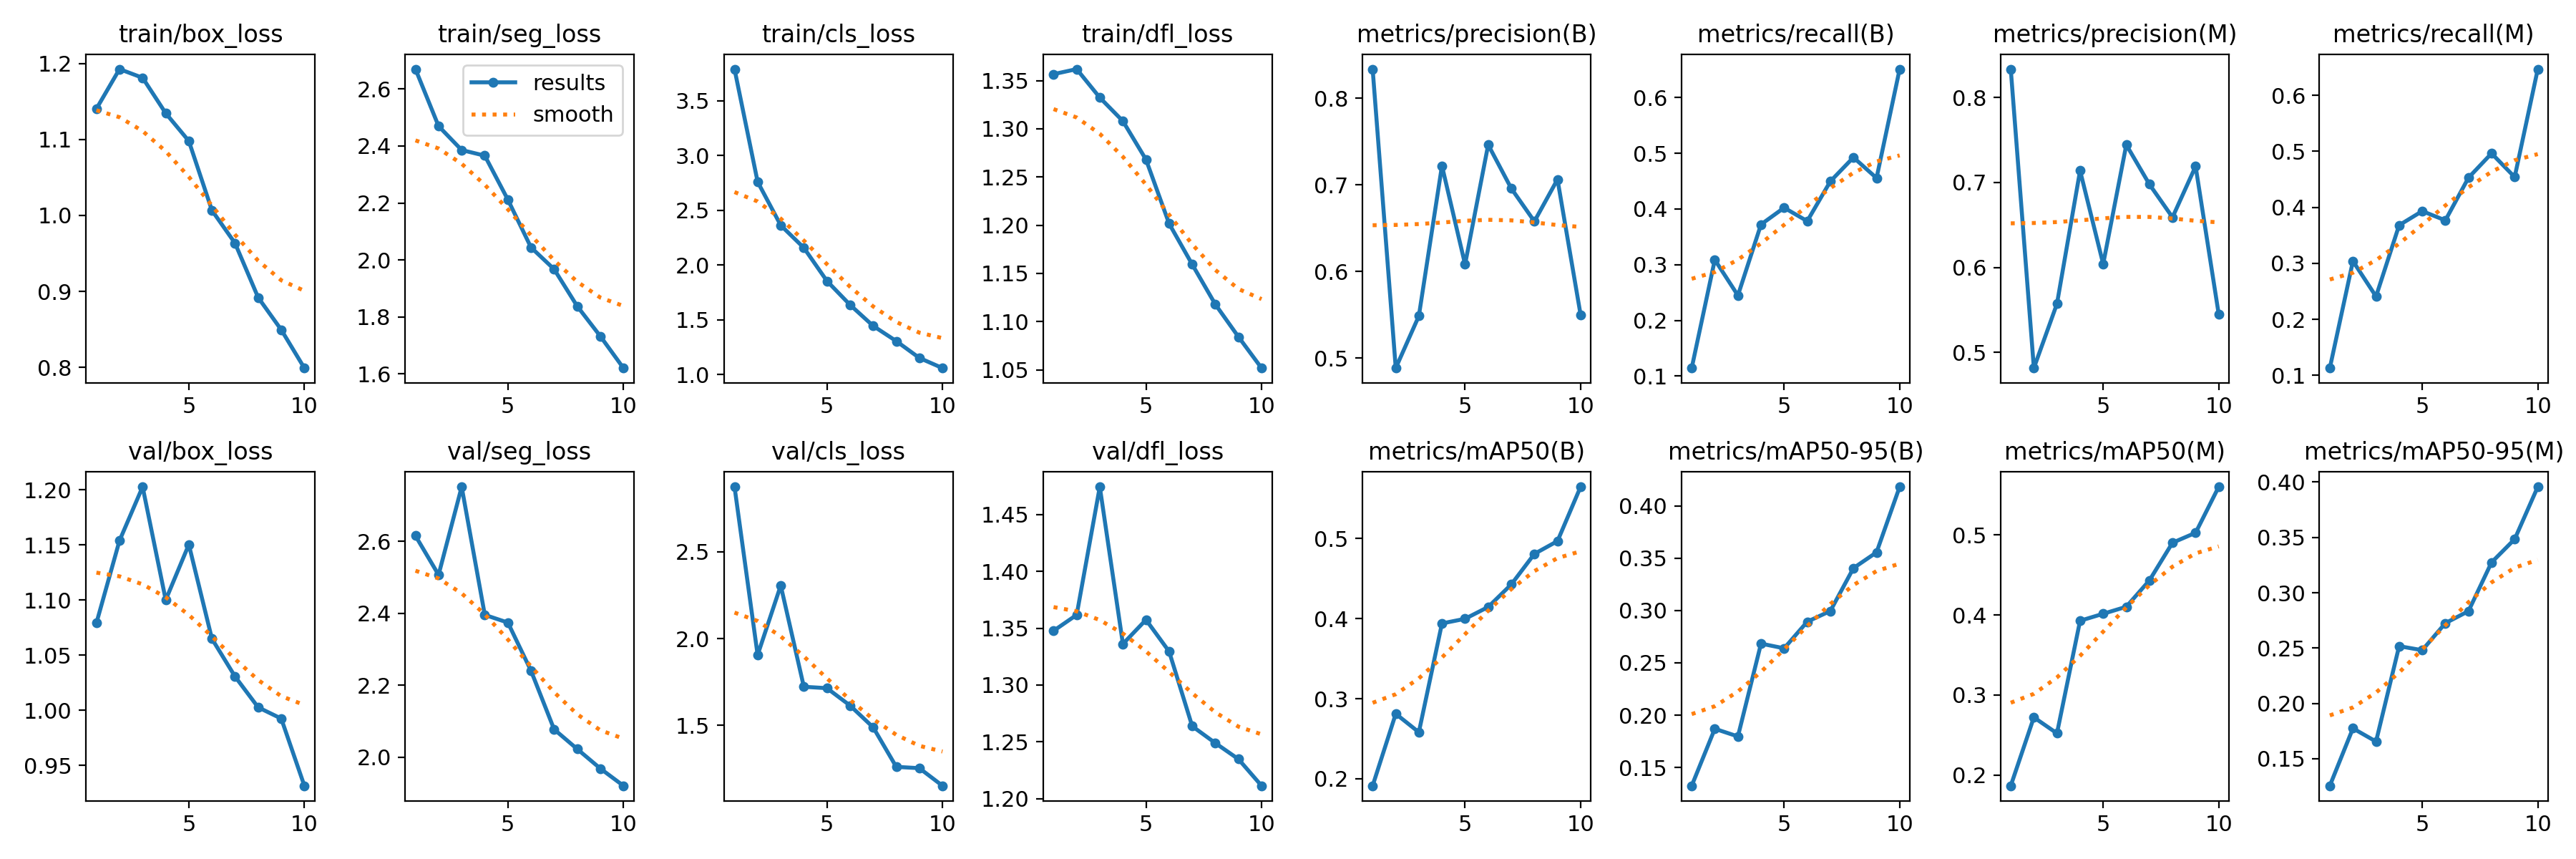

In [12]:
from IPython.display import Image, display
display(Image(filename=f"/content/runs/segment/train/results.png", width=1000))

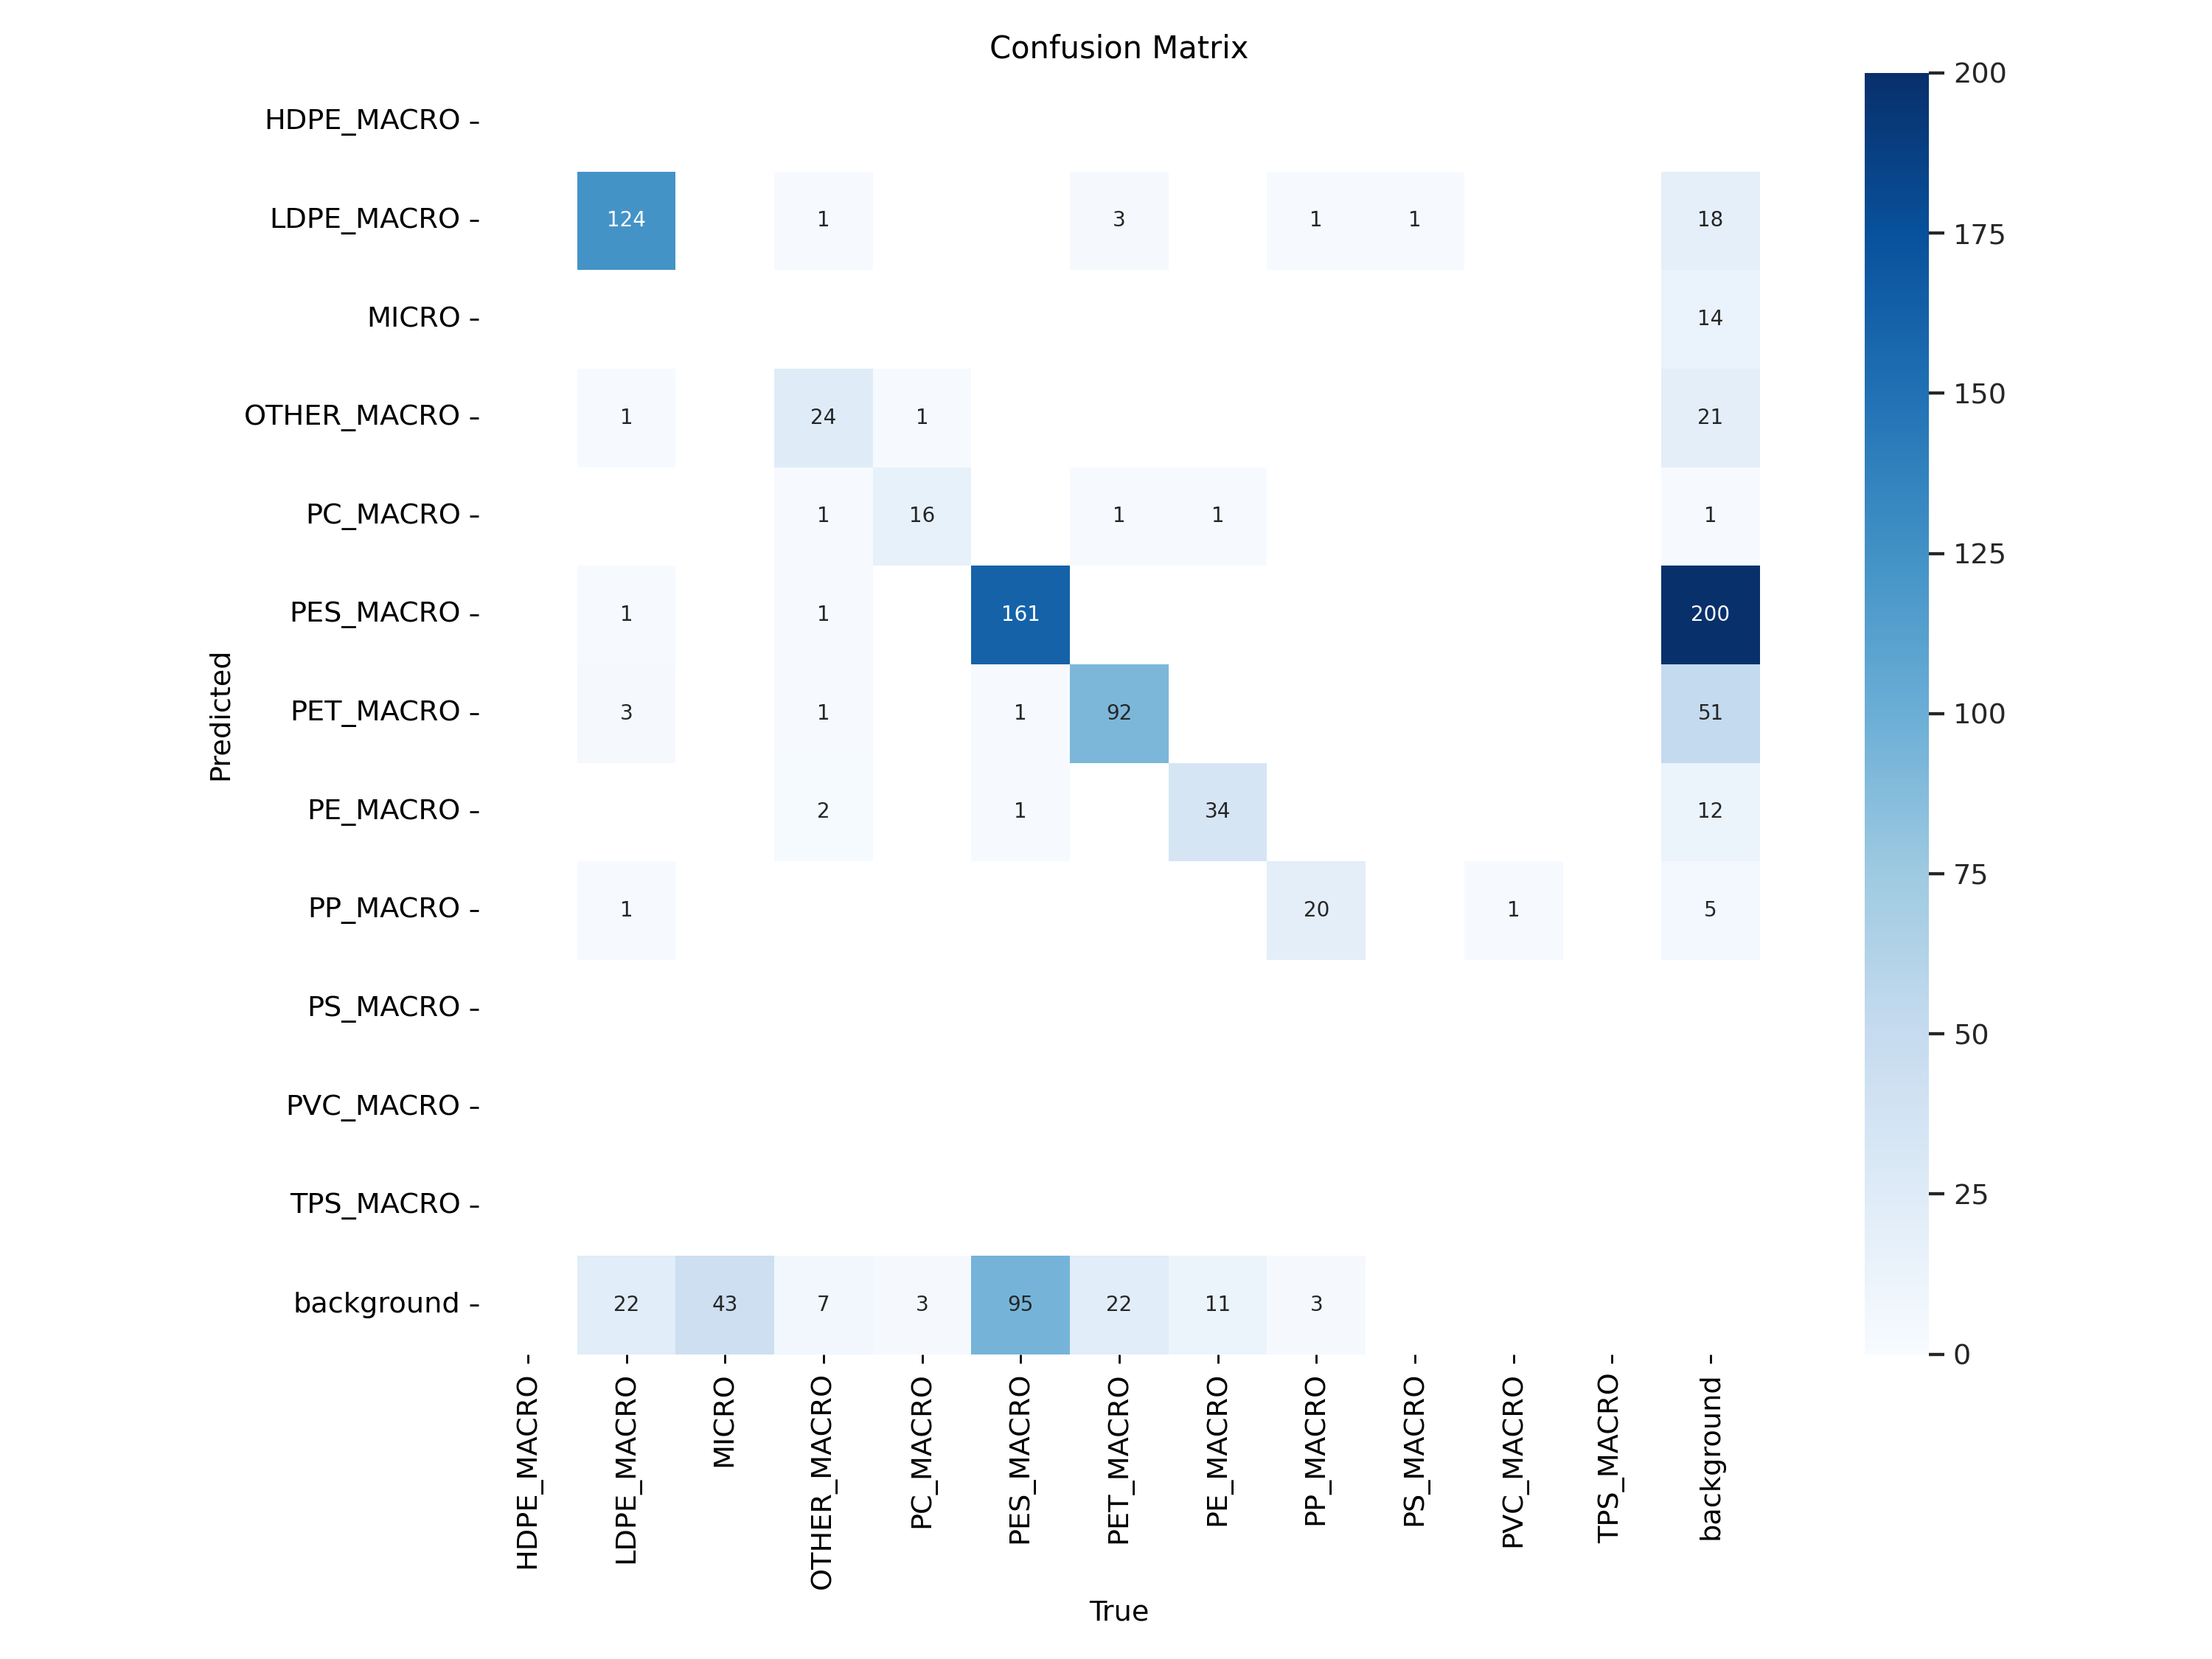

In [13]:
display(Image(filename=f"/content/runs/segment/train/confusion_matrix.png", width=1000))

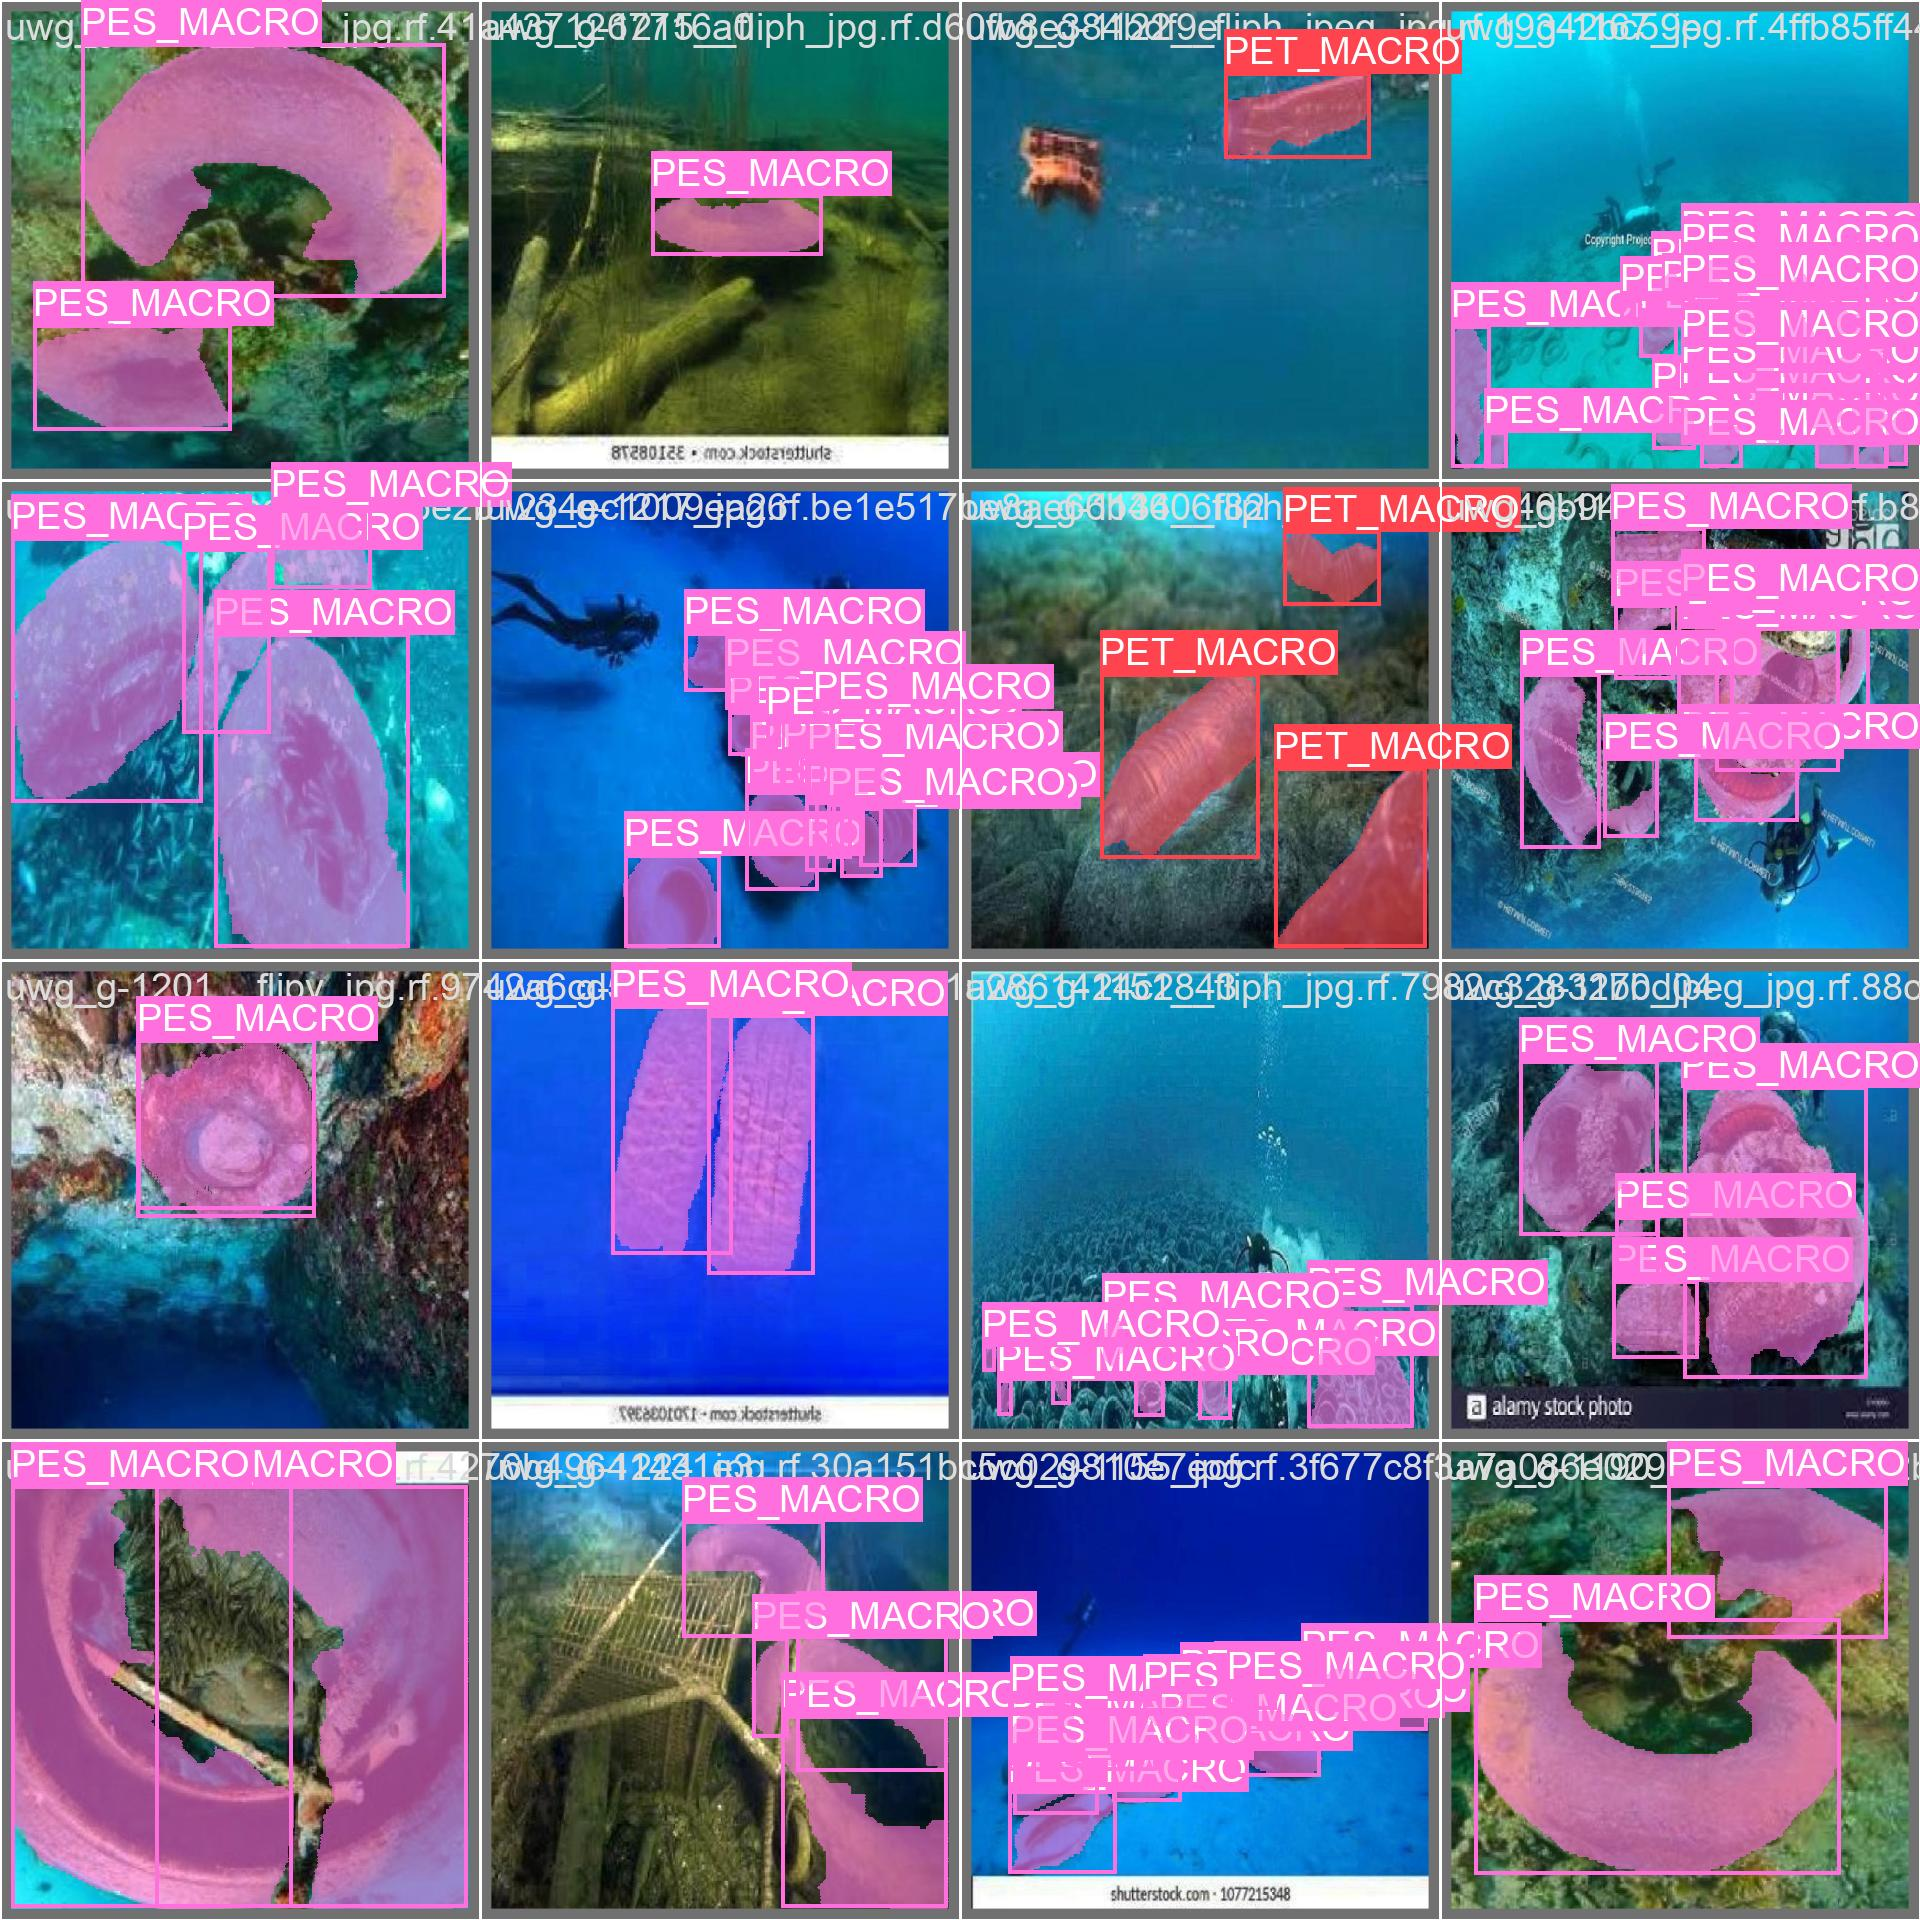

In [14]:
display(Image(filename=f"/content/runs/segment/train/val_batch1_labels.jpg", width=1000))

In [15]:
!yolo task=segment mode=predict model=/content/runs/segment/train/weights/best.pt imgsz=640 conf=0.5 source=/content/Underwater-Plastic-6/test/images

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-seg summary (fused): 265 layers, 2,836,908 parameters, 0 gradients, 10.2 GFLOPs

image 1/135 /content/Underwater-Plastic-6/test/images/0211007105142_jpg.rf.aa56df036b6f3e7d08cbc0fb8231d8b0.jpg: 640x640 (no detections), 12.4ms
image 2/135 /content/Underwater-Plastic-6/test/images/0211007105229_jpg.rf.ffd4526acf6e5fd48655ff2f3e94f792.jpg: 640x640 1 PP_MACRO, 10.2ms
image 3/135 /content/Underwater-Plastic-6/test/images/0211007105251_jpg.rf.ce811ef76764c3171b8c2ba7b1864dc1.jpg: 640x640 1 PP_MACRO, 10.7ms
image 4/135 /content/Underwater-Plastic-6/test/images/07104840_jpg.rf.6d0363ed5542fcd358ba11770791558f.jpg: 640x640 1 PP_MACRO, 10.2ms
image 5/135 /content/Underwater-Plastic-6/test/images/1007104933_jpg.rf.7f309b53b19a3bb5bf802140b4528005.jpg: 640x640 1 PP_MACRO, 10.1ms
image 6/135 /content/Underwater-Plastic-6/test/images/e695b0e58d81e4babfe8aea1e79a84e58fa3e7bda9efbc8ce4b8a2e5bc83e5908ee983bdkle58e

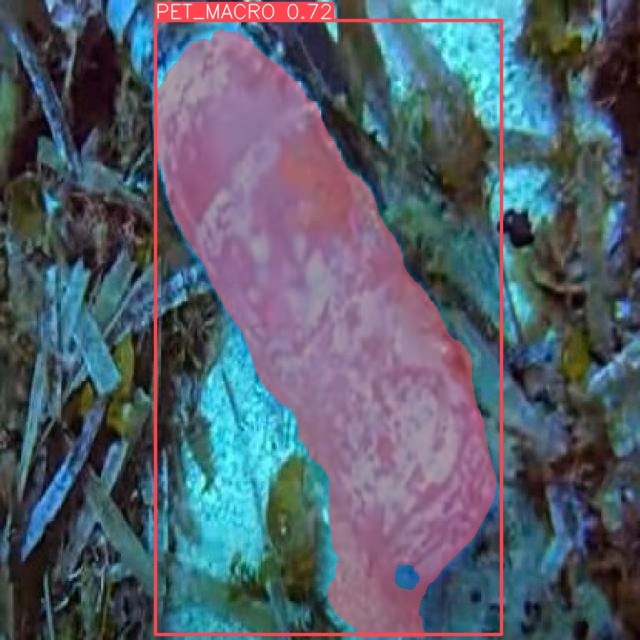

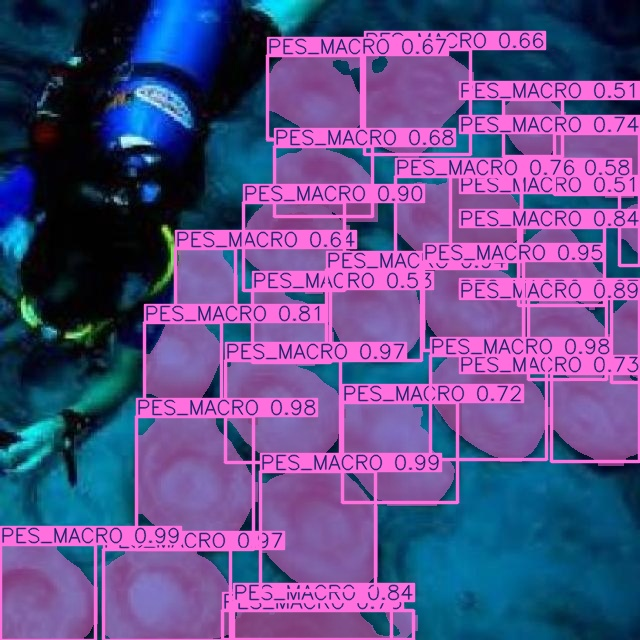

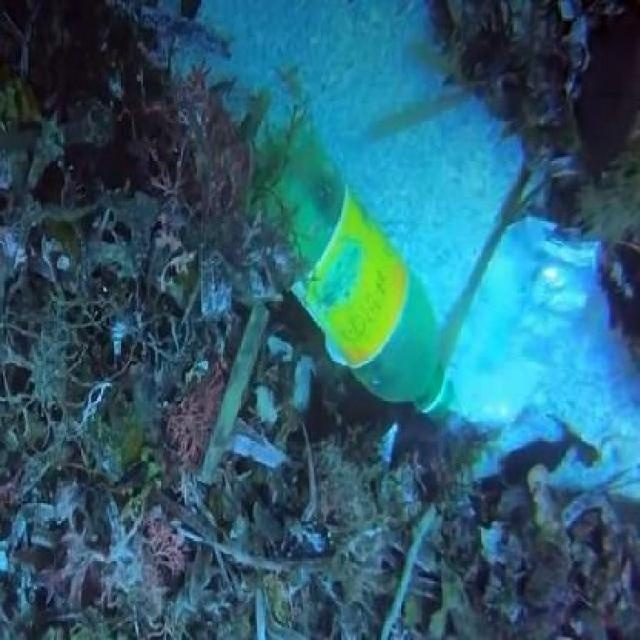

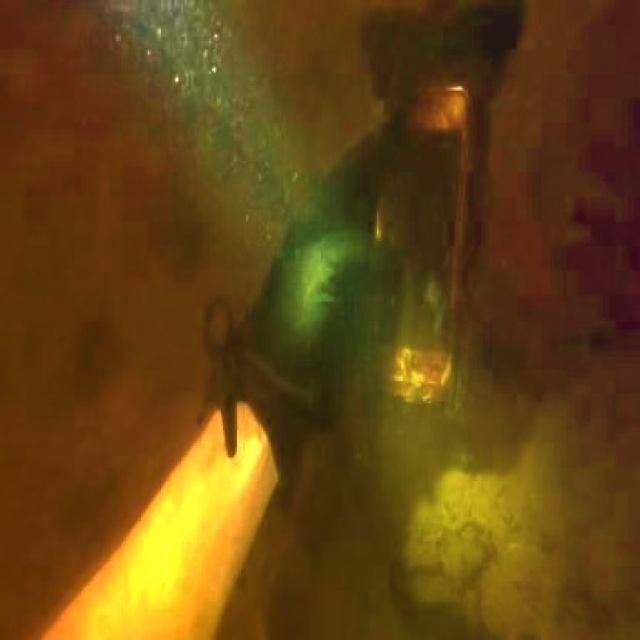

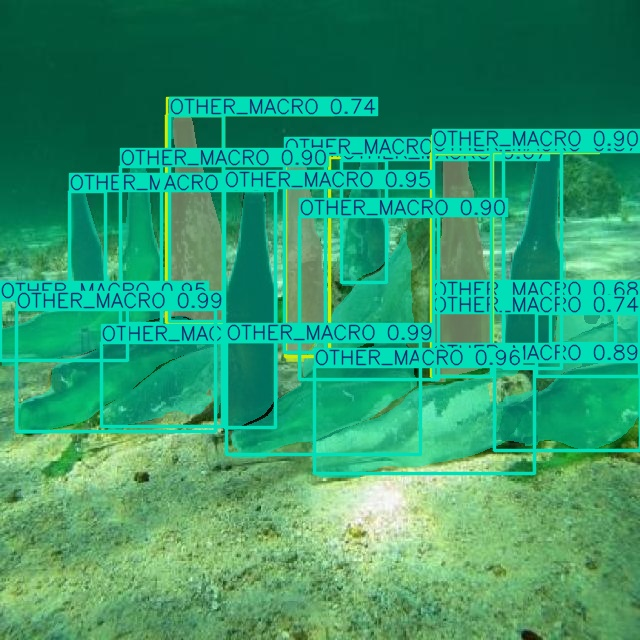

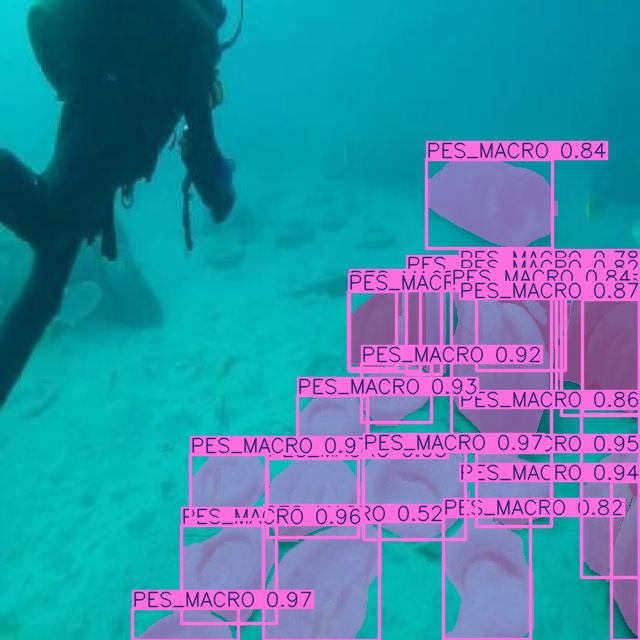

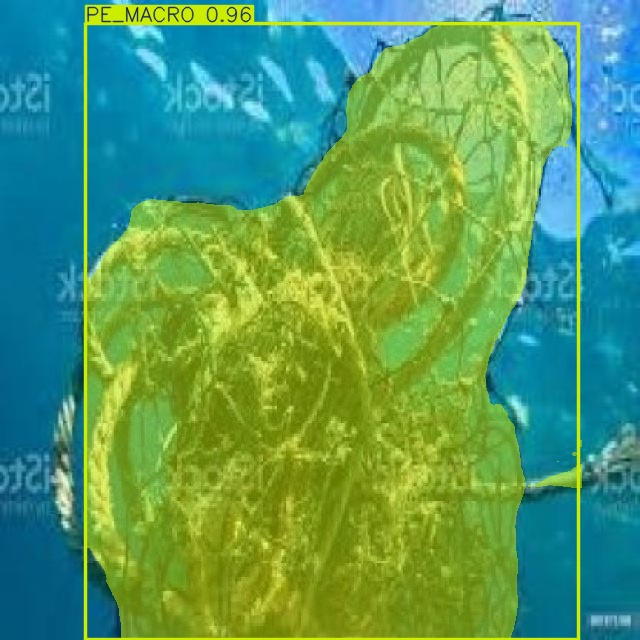

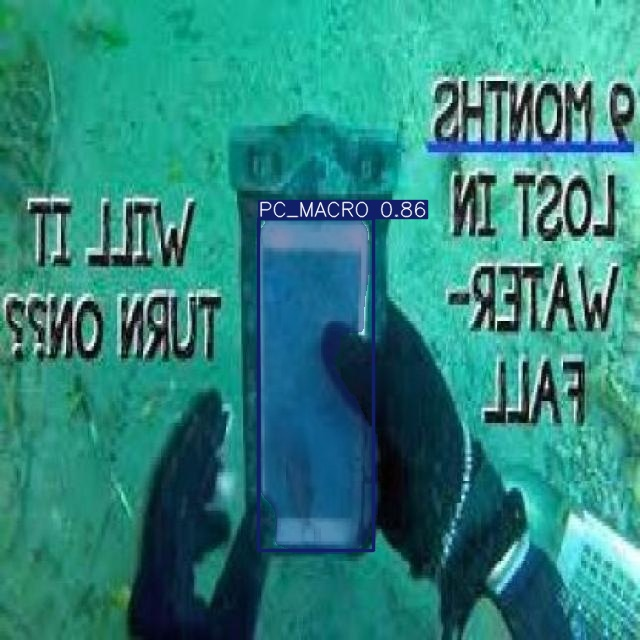

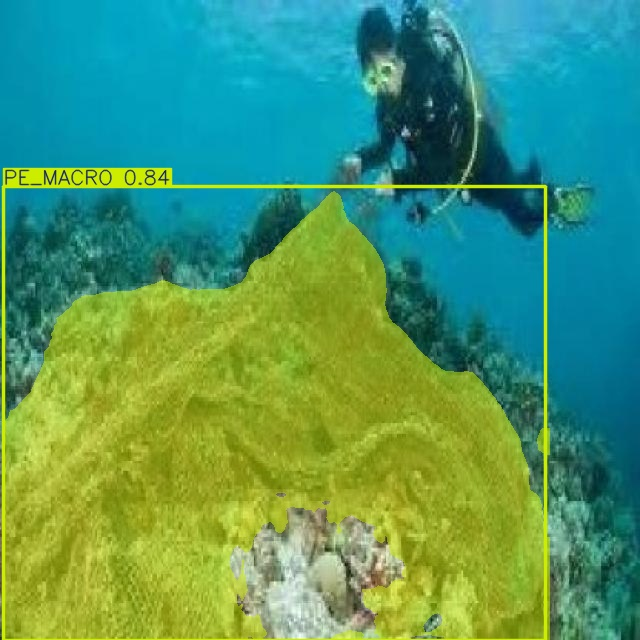

In [18]:
import glob
from IPython.display import Image, display
i = 0
for imageName in glob.glob("/content/runs/segment/predict/*.jpg"):
    if i % 15 ==0 :
        print("\n")
        display(Image(filename=imageName))
    i = i +1
